# vectors layer tutorial

Welcome to the tutorial on the **napari** `Vectors` layer!

This tutorial assumes you have already installed **napari**, know how to launch
the viewer, and are familiar with its layout. For help with installation see our
[installation](./installation) tutorial. For help getting started with the
viewer see our [getting started](./getting_started) tutorial. For help
understanding the organisation of the viewer, including things like the layers
list, the layer properties widgets, the layer control panels, and the dimension
sliders see our [napari viewer](./viewer) tutorial.

This tutorial will teach you about the **napari** `Vectors` layer, including how
to display many vectors simultaneously and adjust their properties. At the end
of the tutorial you should understand how to add a vectors layer and edit it
from the GUI and from the console.

The vectors layer allows you to display many vectors with defined starting
points and directions. It is particularly useful for people who want to
visualize large vector fields, for example if you are doing polarization
microscopy. You can adjust the color, width, and length of all the vectors both
programmatically and from the GUI.

## a simple example

You can create a new viewer and add vectors in one go using the
`napari.view_vectors` method, or if you already have an existing viewer, you can
add shapes to it using `viewer.add_vectors`. The api of both methods is the
same. In these examples we'll mainly use `add_vectors` to overlay shapes onto on
an existing image.

In this example of we will overlay some shapes on the image of a photographer:

In [1]:
import napari
import numpy as np
from skimage import data

# create vector data
n = 250
vectors = np.zeros((n, 2, 2), dtype=np.float32)
phi_space = np.linspace(0, 4 * np.pi, n)
radius_space = np.linspace(0, 100, n)
# assign x-y projection
vectors[:, 1, 0] = radius_space * np.cos(phi_space)
vectors[:, 1, 1] = radius_space * np.sin(phi_space)
# assign x-y position
vectors[:, 0] = vectors[:, 1] + 256

# add the image
viewer = napari.view_image(data.camera(), name='photographer')
# add the vectors
vectors_layer = viewer.add_vectors(vectors, edge_width=3)

/opt/hostedtoolcache/Python/3.8.11/x64/lib/python3.8/site-packages/napari/_vispy/vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


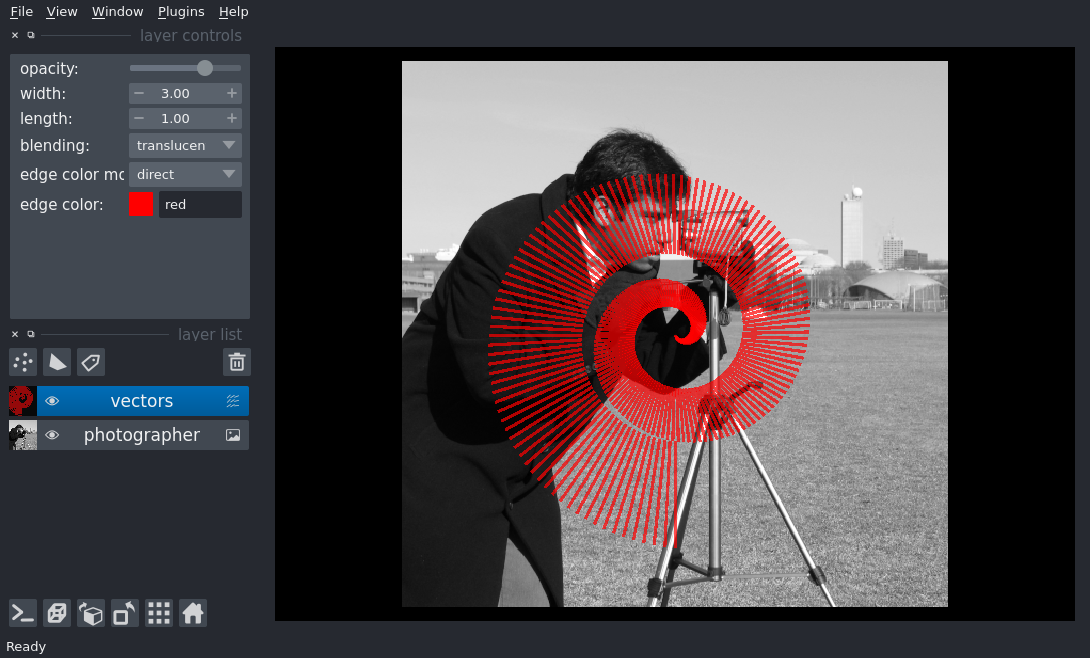

In [2]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

In [3]:
viewer.close()

## arguments of view_vectors and add_vectors

{meth}`~napari.view_layers.view_vectors` and {meth}`~napari.Viewer.add_vectors`
accept the same layer-creation parameters.

In [4]:
help(napari.view_vectors)

Help on function view_vectors in module napari.view_layers:

view_vectors(data, *, properties=None, edge_width=1, edge_color='red', edge_color_cycle=None, edge_colormap='viridis', edge_contrast_limits=None, length=1, name=None, metadata=None, scale=None, translate=None, rotate=None, shear=None, affine=None, opacity=0.7, blending='translucent', visible=True, title='napari', ndisplay=2, order=(), axis_labels=(), show=True) -> napari.viewer.Viewer
    Create a viewer and add a vectors layer.
    
    Parameters
    ----------
    data : (N, 2, D) or (N1, N2, ..., ND, D) array
        An (N, 2, D) array is interpreted as "coordinate-like" data and a
        list of N vectors with start point and projections of the vector in
        D dimensions. An (N1, N2, ..., ND, D) array is interpreted as
        "image-like" data where there is a length D vector of the
        projections at each pixel.
    properties : dict {str: array (N,)}, DataFrame
        Properties for each vector. Each propert

## vectors data

The input data to the vectors layer must either be a Nx2xD numpy array
representing N vectors with start position and projection values in D
dimensions, or it must be an N1xN2 ... xNDxD, array where each of the first D
dimensions corresponds to the voxel of the location of the vector, and the last
dimension contains the D values of the projection of that vector. The former
representation is useful when you have vectors that can start in arbitrary
positions in the canvas. The latter representation is useful when your vectors
are defined on a grid, say corresponding to the voxels of an image, and you have
one vector per grid.

See here for the example from
[`examples/add_vectors_image.py`](https://github.com/napari/napari/blob/master/examples/add_vectors_image.py)
of a grid of vectors defined over a random image:

![image: add vectors overlaid on an
image](../assets/tutorials/add_vectors_image.png)

Regardless of how the data is passed, we convert it to the Nx2xD representation
internally. This representation is  accessible through the `layer.data`
property.

Editing the start position of the vectors from the GUI is not possible. Nor is
it possible to draw vectors from the GUI. If you want to draw lines from the GUI
you should use the `Lines` shape inside a `Shapes` layer.

## 3D rendering of vectors

All our layers can be rendered in both 2D and 3D mode, and one of our viewer
buttons can toggle between each mode. The number of dimensions sliders will be 2
or 3 less than the total number of dimensions of the layer. See for example the
[`examples/nD_vectors.py`](https://github.com/napari/napari/blob/master/examples/nD_vectors.py)
to see shapes in both 2D and 3D:

![image: nD vectors](../assets/tutorials/nD_vectors.gif)

## changing vector length, width, and color

You can multiplicatively scale the length of all the vectors projections using
the `layer.length` property or combobox inside the layer controls panel.

You can also set the width of all the vectors in a layer using the `layer.width`
property or combobox inside the layer controls panel.

You can also set the color of all the vectors in a layer using the
`layer.edge_color` property or dropdown menu inside the layer controls panel.

## layer visibility

All our layers support a visibility toggle that allows you to set the `visible`
property of each layer. This property is located inside the layer widget in the
layers list and is represented by an eye icon.

## layer opacity

All our layers support an opacity slider and `opacity` property that allow you
to adjust the layer opacity between 0, fully invisible, and 1, fully visible.
The opacity value applies globally to all the vectors in the layer.

## blending layers

All our layers support three blending modes `translucent`, `additive`, and
`opaque` that determine how the visuals for this layer get mixed with the
visuals from the other layers.

An `opaque` layer renders all the other layers below it invisible and will fade
to black as you decrease its opacity.

The `translucent` setting will cause the layer to blend with the layers below it
if you decrease its opacity but will fully block those layers if its opacity is
`1`. This is a reasonable default, useful for many applications.

The final blending mode `additive` will cause the layer to blend with the layers
below even when it has full opacity. This mode is especially useful for
visualizing multiple layers at the same time.

## naming layers

All our layers support a `name` property that can be set inside a text box
inside the layer widget in the layers list. The name of each layer is forced
into being unique so that you can use the name to index into `viewer.layers` to
retrieve the layer object.

## scaling layers

All our layers support a `scale` property and keyword argument that will rescale
the layer multiplicatively according to the scale values (one for each
dimension). This property can be particularly useful for viewing anisotropic
data where the size of the voxel in the z dimension might be different then the
size in the x and y dimensions.

## translating layers

All our layers support a `translate` property and keyword argument that you can
use to offset a layer relative to the other layers, which could be useful if you
are trying to overlay two layers for image registration purposes.

## layer metadata

All our layers also support a `metadata` property and keyword argument that you
can use to store an arbitrary metadata dictionary on the layer.

## next steps

Hopefully, this tutorial has given you a detailed understanding of the `Vectors`
layer, including how to create one and control its properties. If you've
explored all the other layer types that **napari** supports maybe checkout our
[gallery](../gallery) for some cool examples of using napari with scientific
data.